In [1]:
from rdkit import Chem
import molhighlighter as mh

### Simple substructure highlight based on SMARTS

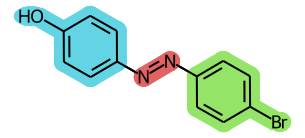

In [2]:
mol = Chem.MolFromSmiles("C1=CC(=CC=C1N=NC2=CC=C(C=C2)Br)O")
highlights = [
    mh.Smarts(mol, "c1ccccc1Br", fill_ring=True),
    mh.Smarts(mol, "N=N"),
    mh.Smarts(mol, "c1ccccc1O", fill_ring=True),
]
mh.MolHighlighter(mol, highlights)

**Multiple matches using the same SMARTS**

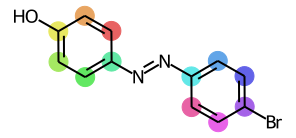

In [3]:
# different colors for the same match by default
highlight = mh.Smarts(mol, "a", single_match=False)
molh = mh.MolHighlighter(mol, [highlight])
molh

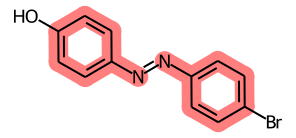

In [4]:
# with the same color (color can be an RGB tuple or a hex code)
highlight = mh.Smarts(mol, "c1ccccc1-[N]", single_match=False,
                                     color=(1, 0.5, .5), same_color=True)
molh = mh.MolHighlighter(mol, [highlight])
molh

### Manual substructure highlight using atom indices

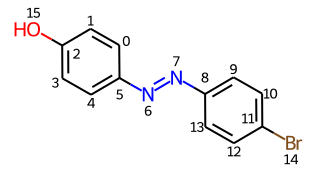

Click on the square to pick a color for the highlight


ColorPicker(value='#e36262')

In [5]:
molh = mh.MolHighlighter(mol)
# display annotated structure
molh.hint()

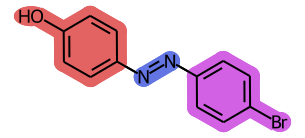

In [6]:
highlights = [
    mh.Highlight([8, 9, 10, 11, 12, 13, 14], color="#d262e3", fill_ring=True),
    mh.Highlight([6, 7], color="#6275e3"),
    mh.Highlight([0, 1, 2, 3, 4, 5, 15], color="#e36262", fill_ring=True),
]
molh.highlights = highlights
molh

### Paired highlight between structure and label

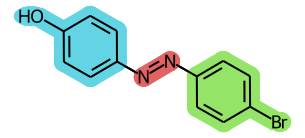

In [7]:
name = "4-[(4-bromophenyl)diazenyl]phenol"
highlights = [
    mh.Smarts(mol, "c1ccccc1Br", "4-bromophenyl", fill_ring=True),
    mh.Smarts(mol, "N=N", "diazenyl"),
    mh.Smarts(mol, "c1ccccc1O", "phenol", fill_ring=True),
]
molh = mh.MolHighlighter(mol, highlights, label=name)
molh

**Coloring the label's font instead of its background**

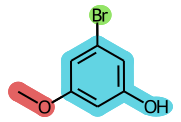

In [8]:
mol = Chem.MolFromSmiles("COC1=CC(O)=CC(Br)=C1")
name = "3-bromo-5-methoxyphenol"
highlights = [
    mh.Smarts(mol, "Br", "3-bromo"),
    mh.Smarts(mol, "[CH3]-[OH0]", "5-methoxy"),
    mh.Smarts(mol, "c1ccccc1-[OH]", "phenol", fill_ring=True),
]
molh = mh.MolHighlighter(mol, highlights, label=name)
molh.configure(highlight_font=True)
molh

**Coloring atoms based on their index:**

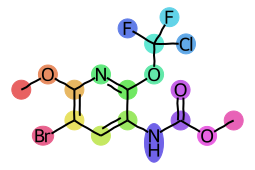

In [9]:
smiles = "COC1=C(C=C(C(=N1)OC(F)(Cl)F)NC(=O)OC)Br"
mol = Chem.MolFromSmiles(smiles)

highlights = [mh.Highlight([atom.GetIdx()], text=atom.GetSymbol())
              for atom in mol.GetAtoms()]
molh = mh.MolHighlighter(mol, highlights, label=smiles)
# set white background (transparent by default)
molh.configure(style="background-color: white; color: black",
               highlight_font=True, comicMode=True)
molh

**Using a single highlight to match multiple items in the label:**

We'll reproduce the figure on the *SMILES* [wikipedia page](https://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system) as an example.

<div style="height: 250px; width: 400px;">
    <img style="display: block; height: 375px; width: 400px; background: url('https://upload.wikimedia.org/wikipedia/commons/0/00/SMILES.png'); background-position: 0 -320px; background-size: 100%;"/>
</div>

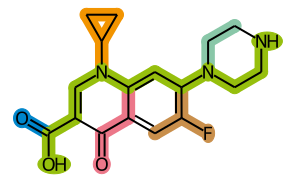

In [10]:
smiles = "N1CCN(CC1)C(C(F)=C2)=CC(=C2C4=O)N(C3CC3)C=C4C(=O)O"
mol = Chem.MolFromSmiles(smiles)
# Last item in the list of highlights is last substructure highlighted on the mol
# The order will have no incidence on the text highlight
highlights = [
    mh.Highlight([3,4,5], "CC1", color="#89c7a8"),
    mh.Highlight([6,7,8,9], "C(F)=C2", color="#c98f4b"),
    mh.Highlight([11,12,13,14], "=C2C4=O", color="#ec7789"),
    mh.Highlight([15,16,17,18], "C3CC3", color="#f29400"),
    mh.Highlight([21,22], "=O", "#0086cb"),
    # use a list to match disconnected fragments of text
    mh.Highlight([0,1,2,3,6,10,11,15,19,20,21,23], ["N1CCN",
                                                    "C",
                                                    "=CC",
                                                    "N",
                                                    "C=C4C",
                                                    "O"], color="#96bf0d"),
]
molh = mh.MolHighlighter(mol, highlights, label=smiles)
molh.configure(style="background-color: white;",
               highlightBondWidthMultiplier=11, highlightRadius=.21)
molh

You can also call `molh.save` to save the figure. Usage:
- if no label was set --> `molh.save("mol.svg")`
- else --> `molh.save()` will display a popup asking where to save

To explicitely display the figure within a cell, call `molh.display()`